In [21]:
import chartify
import numpy as np
import pandas as pd
import pandas_profiling
from scipy import stats
from scipy.stats import shapiro


    import chartify

    # Blank charts tell you how to fill in the labels
    ch = chartify.Chart()
    ch.show('png')



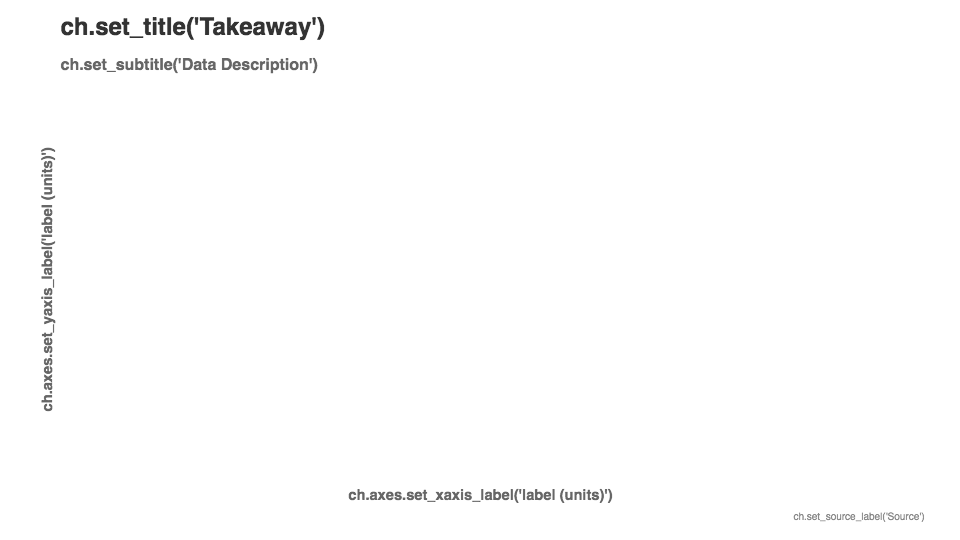

In [6]:
chartify.examples.chart_blank()

In [7]:
data = chartify.examples.example_data()
data.head()

,date,country,fruit,unit_price,quantity,total_price
0,2017-10-21,US,Banana,0.303711,4,1.214846
1,2017-05-30,JP,Banana,0.254109,4,1.016436
2,2017-05-21,CA,Banana,0.268635,4,1.074539
3,2017-09-18,BR,Grape,2.215277,2,4.430554
4,2017-12-08,US,Banana,0.308337,5,1.541687


In [8]:
profile = pandas_profiling.ProfileReport(data)

In [9]:
profile

Number of variables,6
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,47.0 KiB
Average record size in memory,48.1 B
Numeric,3
Categorical,2
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [11]:
mean_table = pd.pivot_table(data, values=['unit_price'], index=['fruit'], columns=['country'], aggfunc=np.mean)

In [12]:
mean_table

unit_price                                        
country         BR        CA        GB        JP        US
fruit                                                     
Apple     0.978156  1.009426  1.007317  0.988600  0.987463
Banana    0.252695  0.249756  0.241405  0.249436  0.252078
Grape     2.022562  1.997512  2.002525  2.060732  1.970634
Orange    0.501151  0.504068  0.501009  0.499539  0.504666

In [17]:
brazil = data[data['country']=='BR']
brazil.shape

(85, 6)

In [18]:
usa = data[data['country']=='US']
usa.shape

(372, 6)

In [30]:
# Shapiro-Wilk test for normality
alpha = 0.05
stat_b, p_b = shapiro(brazil['unit_price'])

if p_b > alpha:
    msg_b = 'Data appear normally distributed (fail to reject null).'
else:
    msg_b = 'Data do not appear normally distributed (reject null).'

In [31]:
print(stat_b)
print(p_b)
print(msg_b)

0.8805408477783203
1.0921888815573766e-06
Data do not appear normally distributed (reject null).


In [32]:
stat_u, p_u = shapiro(usa['unit_price'])

if p_u > alpha:
    msg_u = 'Data appear normally distributed (fail to reject null).'
else:
    msg_u = 'Data do not appear normally distributed (reject null).'